### necessary libraries import 

In [3]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D ,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential



### train-validation data split

In [17]:

datagen=ImageDataGenerator(
    rescale=1/255,validation_split=0.2
)
train_generator=datagen.flow_from_directory('dataset/animals', target_size=(224,224),batch_size=32,class_mode="categorical",subset="training")
test_generator=datagen.flow_from_directory('dataset/animals', target_size=(224,224),batch_size=32,class_mode="categorical",subset="validation")


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


### pretrained model VGG-16 import 

In [19]:
from keras.applications.vgg16 import VGG16
vgg=VGG16(input_shape=(224,224,3))

In [20]:
from keras import Sequential
model=Sequential()


### removing the prediction layer 

In [21]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [22]:
for layer in model.layers:
    layer.trainable=False

### addition the output layer for 90 classes 

In [23]:
model.add(Dense(90,activation='softmax'))

### compiling the model 

In [24]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

### callback earlyStopping to get better accuracy 

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
callback=EarlyStopping(
     monitor="val_loss",
     min_delta=0.0001,
     patience=5,
     verbose=1,
     mode="auto",
     baseline=None,
     restore_best_weights=False,
     

)

### Model Training 

In [27]:
history=model.fit(train_generator,epochs=50,validation_data=test_generator,callbacks=callback)

Epoch 1/50
135/135 [==============================] - 1788s 13s/step - loss: 4.5029 - accuracy: 0.0935 - val_loss: 3.8792 - val_accuracy: 0.1361
Epoch 2/50
135/135 [==============================] - 1708s 13s/step - loss: 3.2926 - accuracy: 0.2370 - val_loss: 3.3685 - val_accuracy: 0.2361
Epoch 3/50
135/135 [==============================] - 1732s 13s/step - loss: 2.8035 - accuracy: 0.3329 - val_loss: 3.0416 - val_accuracy: 0.3028
Epoch 4/50
135/135 [==============================] - 1694s 13s/step - loss: 2.5102 - accuracy: 0.3905 - val_loss: 2.9831 - val_accuracy: 0.2667
Epoch 5/50
135/135 [==============================] - 1692s 13s/step - loss: 2.3116 - accuracy: 0.4236 - val_loss: 2.7449 - val_accuracy: 0.3472
Epoch 6/50
135/135 [==============================] - 1691s 13s/step - loss: 2.0470 - accuracy: 0.4824 - val_loss: 2.6105 - val_accuracy: 0.3565
Epoch 7/50
135/135 [==============================] - 1687s 13s/step - loss: 1.9991 - accuracy: 0.4977 - val_loss: 2.4732 - val_ac

In [28]:
import matplotlib.pyplot as plt 


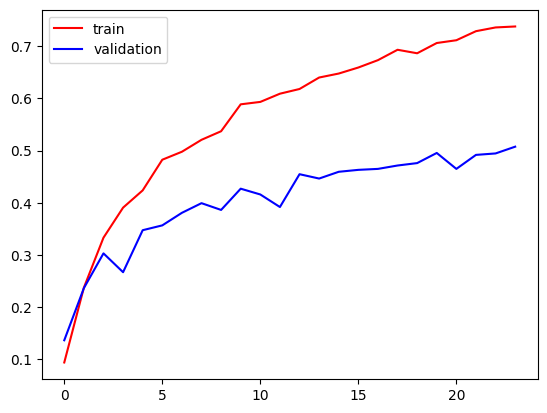

In [29]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

### testing the model 

In [5]:
from tensorflow.keras.models import load_model

In [6]:
model=load_model('animal_classifier.h5')

In [1]:
from tensorflow.keras.preprocessing import image

In [2]:
import numpy as np

In [27]:
img_path='sample/dog.jpg'
img=image.load_img(img_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255.0
predictions=model.predict(img_array)

1/1 [==============================] - 0s 291ms/step


In [28]:
max_idx=np.argmax(predictions)

In [29]:
max_idx

33

In [13]:
import os

In [14]:
finames=os.listdir('dataset/animals')

In [30]:
finames[max_idx]

'hamster'

### Save the model 

In [ ]:
model.save('animal_classifier.h5')